In [5]:
from experiments import main
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotter import plot_results
from objectives import FuncL2Test, FuncL1Test, NewTest, FTest, SumFuncL1Test

dim = 1000
max_iter = 300000
sample = 30
constr_type = 'simplex'
radius = np.log(dim)**(1/2) if constr_type=='simplex' else 1
objective = SumFuncL1Test(dim=dim)
norm_str_conv = 1
norm_lipsch = 1
sigma = 0.
objective_min = objective.get_min()
noise_family = 'Gaussian'
to_plot = False
to_cache = True
to_save_plot = True

In [26]:
def plot_results(max_iter, dim, constr_type,
                 objective_min, results, SIGNATURE, to_save=False):

    grid = np.arange(max_iter)+1

    jump_default = 100
    multiplier = 50

    jump = jump_default if multiplier * max_iter > jump_default else 1
    colours = sns.color_palette('colorblind')

    labels = {
    'Our' : r'\Large $\ell_1$-randomization (Our)',
    'Spherical' : r'\Large $\ell_2$-randomization',
    'Gaussian' : r'\Large Gaussian randomization',
    }

    lines = {
    'Our' : '-',
    'Spherical' : '-.',
    'Gaussian' : '--',
    }


    plt.figure(figsize=(7,3))
    for idx, (method_name, result) in enumerate(results.items()):

        error = np.array(result) - objective_min
        std = np.array(error).std(0)
        mean = np.average(error, axis=0)



        plt.plot(grid[0::jump], np.array(mean)[0::jump], color=colours[idx],
                 label=labels[method_name], linestyle=lines[method_name])
        plt.fill_between(grid[0::jump], mean[0::jump]-std[0::jump],
                         mean[0::jump]+std[0::jump],
                         facecolor=colours[idx], alpha=0.3)


    plt.xlabel(r'\Large Number of iterations')
    plt.ylabel(r"\Large Optimization error")


    plt.xlim(0, 10000)
#     plt.yscale('log')
#     plt.xscale('log')
    plt.title(rf"\Large Constraint type: {{\Large\texttt {constr_type}}}; \Large dimension: \Large $d={dim}$")
    plt.legend()
    plt.show()

In [3]:
results, SIGNATURE = main(dim, max_iter, sample, constr_type, radius, objective,
    norm_str_conv, norm_lipsch, sigma, objective_min, noise_family,
    to_cache, to_save_plot)

100%|██████████| 30/30 [00:04<00:00,  6.37it/s]


<IPython.core.display.Javascript object>


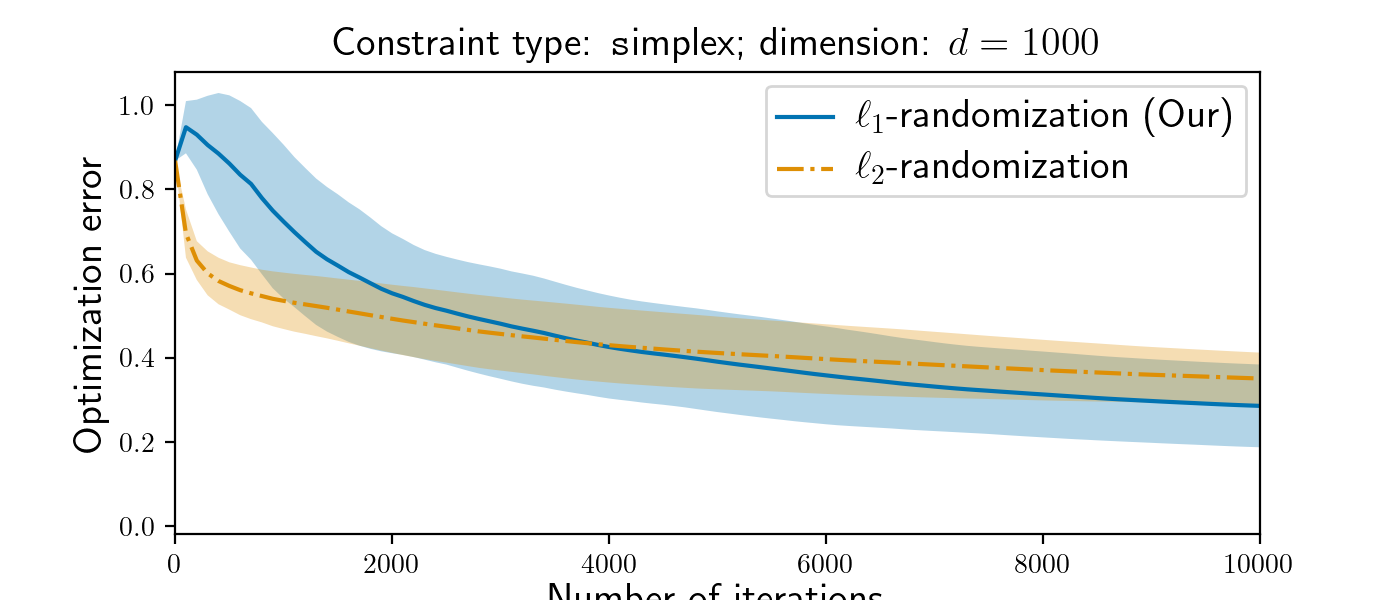

In [27]:
%matplotlib notebook
plot_results(max_iter, dim, constr_type,
             objective_min, results, SIGNATURE, to_save_plot)